In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
mnist= tf.keras.datasets.mnist

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [ ]:
print(x_train[8])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   5  63 197   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 230  24   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 254  48   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 255  4

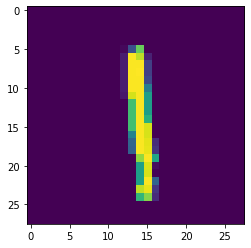

In [ ]:
plt.imshow(x_train[8])

In [ ]:
print(y_train[8])

1


In [ ]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
x_train=x_train.astype(float)/255.0
x_test=x_test.astype(float)/255.0

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer,Conv2D,MaxPooling2D,Flatten ,Dense

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(28,28,1)))
model.add(Conv2D(filters=10,kernel_size=3,strides=(1,1),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=10,kernel_size=3,strides=(1,1),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=10,kernel_size=3,strides=(1,1),padding='valid',activation='softmax'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 10)        100       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 10)        910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 10)          910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 10)                0

In [ ]:
import tensorflow
model.compile(optimizer='adam',loss=tensorflow.keras.losses.categorical_crossentropy,metrics=['acc'])

In [ ]:
x_train=x_train.reshape((60000,28,28,1))
x_test=x_test.reshape((10000,28,28,1))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
history=model.fit(x_train,y_train,epochs=30,batch_size=512,validation_data=(x_test,y_test))

Epoch 1/30
118/118 [==============================] - 18s 145ms/step - loss: 2.0386 - acc: 0.3108 - val_loss: 1.2215 - val_acc: 0.6142
Epoch 2/30
118/118 [==============================] - 17s 143ms/step - loss: 0.8933 - acc: 0.7108 - val_loss: 0.6327 - val_acc: 0.8042
Epoch 3/30
118/118 [==============================] - 17s 143ms/step - loss: 0.5277 - acc: 0.8316 - val_loss: 0.4166 - val_acc: 0.8738
Epoch 4/30
118/118 [==============================] - 17s 143ms/step - loss: 0.3769 - acc: 0.8853 - val_loss: 0.3144 - val_acc: 0.9079
Epoch 5/30
118/118 [==============================] - 17s 143ms/step - loss: 0.3035 - acc: 0.9084 - val_loss: 0.2646 - val_acc: 0.9224
Epoch 6/30
118/118 [==============================] - 17s 144ms/step - loss: 0.2615 - acc: 0.9223 - val_loss: 0.2342 - val_acc: 0.9306
Epoch 7/30
118/118 [==============================] - 17s 145ms/step - loss: 0.2363 - acc: 0.9296 - val_loss: 0.2139 - val_acc: 0.9387
Epoch 8/30
118/118 [==============================] - 1

In [ ]:
history.history.keys()

In [ ]:
history.history.keys()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.legend(['validation'],loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()